In [2]:
import pandas as pd
import numpy as np
import json
import pytz
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

read csv and json files

In [3]:
# CAvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/CAvideos.csv')
# DEvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/DEvideos.csv')
# FRvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/FRvideos.csv')
# GBvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/GBvideos.csv')
# INvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/INvideos.csv')
# JPvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/JPvideos.csv',encoding = 'ISO-8859-1')
# KRvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/KRvideos.csv',encoding = 'ISO-8859-1')
# MXvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/MXvideos.csv',encoding = 'ISO-8859-1')
# RUvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/RUvideos.csv',encoding = 'ISO-8859-1')
USvideos = pd.read_csv('drive/MyDrive/Yutube_data/data/USvideos.csv')

In [4]:
# with open('drive/MyDrive/Yutube_data/data/CA_category_id.json', 'r') as json_file:
#     CA_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/DE_category_id.json', 'r') as json_file:
#     DE_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/FR_category_id.json', 'r') as json_file:
#     FR_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/GB_category_id.json', 'r') as json_file:
#     GB_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/IN_category_id.json', 'r') as json_file:
#     IN_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/JP_category_id.json', 'r') as json_file:
#     JP_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/KR_category_id.json', 'r') as json_file:
#     KR_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/MX_category_id.json', 'r') as json_file:
#     MX_category_id = json.load(json_file)
# with open('drive/MyDrive/Yutube_data/data/RU_category_id.json', 'r') as json_file:
#     RU_category_id = json.load(json_file)
with open('drive/MyDrive/Yutube_data/data/US_category_id.json', 'r') as json_file:
    US_category_id = json.load(json_file)

EDA

In [5]:
category = USvideos
category['trending_date'] = '20' + category['trending_date']
category['trending_date'] = pd.to_datetime(category['trending_date'], format='%Y.%d.%m')

In [6]:
categoryID = category.groupby('category_id')['views'].sum().reset_index()

In [7]:
items = US_category_id.get("items", [])
result = [{"category_id": item["id"], "title": item["snippet"]["title"]} for item in items]
category_names = pd.DataFrame(result)

In [8]:
category_names['category_id'] = category_names['category_id'].astype('int64')

In [9]:
category_result = pd.merge(categoryID, category_names, on='category_id', how='inner')
category_result

,category_id,views,title
0,1,7284156721,Film & Animation
1,2,520690717,Autos & Vehicles
2,10,40132892190,Music
3,15,764651989,Pets & Animals
4,17,4404456673,Sports
5,19,343557084,Travel & Events
6,20,2141218625,Gaming
7,22,4917191726,People & Blogs
8,23,5117426208,Comedy
9,24,20604388195,Entertainment


In [ ]:
category_result['views'].mean()

6041985634.5

In [ ]:
USvideos['publish_time'] = pd.to_datetime(USvideos['publish_time'], format='%Y-%m-%d')
USvideos['publish_time'] = USvideos['publish_time'].apply(lambda x: x.replace(tzinfo=None) if x is not None else x)
USvideos['trending_date'] = USvideos['trending_date'].apply(lambda x: x.replace(hour=23, minute=59, second=59))
USvideos['time_diff'] = USvideos['trending_date'] - USvideos['publish_time']
time_analyze = USvideos[['publish_time','trending_date','time_diff','category_id','views','likes','dislikes','comment_count']]
time_analyze['increase/days'] = time_analyze['views']/(time_analyze['time_diff'].dt.total_seconds()/3600/24)
time_analyze

<ipython-input-35-966dff1b2120>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_analyze['increase/days'] = time_analyze['views']/(time_analyze['time_diff'].dt.total_seconds()/3600/24)


,publish_time,trending_date,time_diff,category_id,views,likes,dislikes,comment_count,increase/days
0,2017-11-13 17:13:01,2017-11-14 23:59:59,1 days 06:46:58,22,748374,57527,2966,15954,5.834748e+05
1,2017-11-13 07:30:00,2017-11-14 23:59:59,1 days 16:29:59,24,2418783,97185,6146,12703,1.433363e+06
2,2017-11-12 19:05:24,2017-11-14 23:59:59,2 days 04:54:35,23,3191434,146033,5339,8181,1.447644e+06
3,2017-11-13 11:00:04,2017-11-14 23:59:59,1 days 12:59:55,24,343168,10172,666,2146,2.226038e+05
4,2017-11-12 18:01:41,2017-11-14 23:59:59,2 days 05:58:18,24,2095731,132235,1989,17518,9.319250e+05
...,...,...,...,...,...,...,...,...,...
40944,2018-05-18 13:00:04,2018-06-14 23:59:59,27 days 10:59:55,15,1685609,38160,1385,2657,6.138801e+04
40945,2018-05-18 01:00:06,2018-06-14 23:59:59,27 days 22:59:53,22,1064798,60008,382,3936,3.808528e+04
40946,2018-05-18 17:34:22,2018-06-14 23:59:59,27 days 06:25:37,24,1066451,48068,1032,3992,3.911028e+04
40947,2018-05-17 17:00:04,2018-06-14 23:59:59,28 days 06:59:55,1,5660813,192957,2846,13088,2.000881e+05


In [ ]:
time_analyze_name = pd.merge(time_analyze, category_names, on='category_id', how='inner')
time_analyze_name['increase_day_diff'] = time_analyze_name['time_diff'].dt.total_seconds()/3600/24

In [ ]:
time_analyze_name

,publish_time,trending_date,time_diff,category_id,views,likes,dislikes,comment_count,increase/days,title,increase_day_diff
0,2017-11-13 17:13:01,2017-11-14 23:59:59,1 days 06:46:58,22,748374,57527,2966,15954,583474.828999,People & Blogs,1.282616
1,2017-04-21 06:47:32,2017-11-14 23:59:59,207 days 17:12:27,22,98966,2486,184,532,476.446367,People & Blogs,207.716979
2,2017-11-11 15:00:03,2017-11-14 23:59:59,3 days 08:59:56,22,321053,4451,1772,895,95128.119727,People & Blogs,3.374954
3,2017-11-11 18:08:04,2017-11-14 23:59:59,3 days 05:51:55,22,197062,7250,217,456,60739.371065,People & Blogs,3.244387
4,2017-11-11 01:19:33,2017-11-14 23:59:59,3 days 22:40:26,22,2744430,115426,1110,6541,695717.908845,People & Blogs,3.944745
...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-05-10 21:01:22,2018-06-02 23:59:59,23 days 02:58:37,43,1324482,22413,608,1644,57277.276684,Shows,23.124039
40945,2018-05-10 21:01:22,2018-06-03 23:59:59,24 days 02:58:37,43,1332252,22461,610,1648,55225.079870,Shows,24.124039
40946,2018-05-10 21:01:22,2018-06-04 23:59:59,25 days 02:58:37,43,1340039,22504,615,1648,53336.924896,Shows,25.124039
40947,2018-05-10 21:01:22,2018-06-05 23:59:59,26 days 02:58:37,43,1345086,22542,615,1649,51488.438747,Shows,26.124039


In [ ]:
time_analyze_name.to_csv('time_analyze_name.csv')

Data Preprocessing

In [10]:
data = pd.read_csv('drive/MyDrive/Yutube_data/data/USvideos.csv')
data['trending_date'] = '20' + data['trending_date']
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%Y.%d.%m')
data['category_id'] = data['category_id'].astype('int64')
data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [11]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
data.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               578
dtype: int64

In [12]:
data[data['tags']=='[none]']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,2017-11-14,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
97,xfmipNU4Odc,2017-11-14,Edna's registered owner thought she was dead f...,Hope For Paws - Official Rescue Channel,15,2017-11-10T18:02:04.000Z,[none],284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\...
133,X7flefV8tec,2017-11-14,"President Bill Clinton On Dictators, Democracy...",Team Coco,24,2017-11-09T02:37:49.000Z,[none],366180,4364,4448,1997,https://i.ytimg.com/vi/X7flefV8tec/default.jpg,False,False,False,#ConanNYC Highlight: President Clinton talks a...
136,5x1FAiIq_pQ,2017-11-14,Alicia Keys - When You Were Gone,Alicia Keys,10,2017-11-09T15:49:21.000Z,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...
175,4d07RXYLsJE,2017-11-14,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40822,VGykknw9eCM,2018-06-14,"Made Defiant: The Mixtape ft. Neymar Jr., Kane...",Beats by Dre,10,2018-06-07T07:01:06.000Z,[none],3577614,12318,1345,1414,https://i.ytimg.com/vi/VGykknw9eCM/default.jpg,False,False,False,"When your time comes, you have two choices. Yo..."
40826,fAIX12F6958,2018-06-14,Bumblebee (2018) - Official Teaser Trailer - P...,Paramount Pictures,1,2018-06-05T07:00:01.000Z,[none],19864779,228670,16420,46318,https://i.ytimg.com/vi/fAIX12F6958/default.jpg,False,False,False,Every adventure has a beginning. Watch the off...
40872,gS1DbvHHVH0,2018-06-14,Going in to brain surgery,Simone Giertz,28,2018-05-30T14:22:13.000Z,[none],1635301,120791,1098,20711,https://i.ytimg.com/vi/gS1DbvHHVH0/default.jpg,False,False,False,We’ll post an update on Instagram and Twitter ...
40880,E4c7EE8_IX0,2018-06-14,Weezer - Africa,weezer,10,2018-05-29T12:00:11.000Z,[none],4682557,115240,5069,9170,https://i.ytimg.com/vi/E4c7EE8_IX0/default.jpg,False,False,False,Stream + download the song: http://fanlink.to/...


Check and clean fraud data

In [13]:
data_group = data.groupby('category_id')
grouped_dataframes = [group for _, group in data_group]

Train test split

In [14]:
X_train = []
X_test = []
X_holdout = []
y_train = []
y_test = []
y_holdout = []
for i, group_df in enumerate(grouped_dataframes):
  X = group_df[['likes','dislikes','comment_count']]
  y = group_df['views']
  X_ori_train, X_cur_test, y_ori_train, y_cur_test = train_test_split(X, y,test_size = 0.2, random_state = 999)
  X_cur_train, X_cur_holdout, y_cur_train, y_cur_holdout= train_test_split(X_ori_train, y_ori_train, test_size=0.1, random_state=999)
  X_train.append(X_cur_train)
  X_test.append(X_cur_test)
  X_holdout.append(X_cur_holdout)
  y_train.append(y_cur_train)
  y_test.append(y_cur_test)
  y_holdout.append(y_cur_holdout)

Linear regression model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model_lr_list = []
for i in range(len(X_train)):
  model = LinearRegression()
  model.fit(X_train[i], y_train[i])
  model_lr_list.append(model)
  print("slope "+str(i)+" is: ", model.coef_)
  print("estimate "+str(i)+" is: ", model.intercept_)

slope 0 is:  [ 41.79749102 305.77078178 -79.61792274]
estimate 0 is:  14445.590598632116
slope 1 is:  [  35.23550124  575.54759788 -206.62177632]
estimate 1 is:  1042488.7312728345
slope 2 is:  [ 23.94977542 391.48765598 -98.07750736]
estimate 2 is:  -247387.52198830806
slope 3 is:  [  17.54163102 1015.32307633  -26.12072317]
estimate 3 is:  -32400.536563362228
slope 4 is:  [ 20.19317455 109.49792037  70.67349313]
estimate 4 is:  492640.8290854853
slope 5 is:  [ 34.91821642 129.13578471 -58.33604605]
estimate 5 is:  321562.3342306124
slope 6 is:  [ 39.34409811   6.9584201  -35.52564867]
estimate 6 is:  -114691.44238229701
slope 7 is:  [14.66790813 26.41366971 -2.75458333]
estimate 7 is:  613207.4682390287
slope 8 is:  [ 16.43949869 160.34186279 -21.15716327]
estimate 8 is:  234705.78355842107
slope 9 is:  [ 39.43669729  46.85518353 -74.5817473 ]
estimate 9 is:  319212.1325844792
slope 10 is:  [37.29581573 19.4220636  17.51760401]
estimate 10 is:  232316.84162009443
slope 11 is:  [  8.3

In [16]:
mse_lr = []
for i in range(len(X_test)):
  y_pred = model_lr_list[i].predict(X_test[i])
  mse_cur = mean_squared_error(y_test[i], y_pred)
  mse_lr.append(mse_cur)
mse_lr

[8080478749550.883,
 11288802815566.889,
 27366763532542.312,
 174325625742.92657,
 2482176633679.2983,
 12553132231546.535,
 3242366873566.183,
 10320006722873.422,
 1382419674407.231,
 5126278750606.993,
 936898837055.6868,
 1523242331269.8289,
 93733977533.45293,
 1923225918357.7795,
 8987030681.958406,
 2897051499.7006855]

Decision tree regression model

In [17]:
from sklearn.tree import DecisionTreeRegressor
model_dt_list = []
for i in range(len(X_train)):
  model = DecisionTreeRegressor(random_state=999)
  model.fit(X_train[i], y_train[i])
  model_dt_list.append(model)

In [18]:
mse_dt = []
r2_dt = []
for i in range(len(X_test)):
  y_pred = model_dt_list[i].predict(X_test[i])
  mse_cur = mean_squared_error(y_test[i], y_pred)
  r2 = r2_score(y_test[i], y_pred)
  mse_dt.append(mse_cur)
  r2_dt.append(r2)
print("mse: ",mse_dt)
print("r2: ",r2_dt)

mse:  [5233357803716.728, 17553461980871.04, 11179486975450.873, 103195255482.17392, 999171581590.204, 5084148113681.926, 808398923555.9939, 4837953209802.449, 460897551035.09827, 2011058587130.331, 168177964624.84677, 451220050907.0808, 38146228557.87417, 232701626398.05054, 24999339063.604168, 535002252.0833333]
r2:  [0.831979314440699, -0.5590694115897825, 0.9571495690528837, 0.9167216744123703, 0.9262325305050858, 0.5706015973687236, 0.9151243233040391, 0.5947201467175287, 0.9082225742015752, 0.9380118966873268, 0.8824003944449054, 0.9063238996078242, 0.9455114324517184, 0.9776937762282372, 0.9994106714738704, 0.9978980306918898]


Compare LR and DTR

In [19]:
dt_better = []
better_times = 0
for i in range(len(mse_dt)):
  if mse_dt[i] <= mse_lr[i]:
    dt_better.append(True)
    better_times += 1
  else:
    dt_better.append(False)
print(dt_better)
print("better ratio: ", better_times/len(mse_dt))

[True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True]
better ratio:  0.875


Remove fraud data

In [20]:
filtered_rows = pd.DataFrame()
for i, group_df in enumerate(grouped_dataframes):
  X = group_df[['likes','dislikes','comment_count']]
  y = group_df['views']
  y_pred = model_dt_list[i].predict(X)
  cut_rows = grouped_dataframes[i][grouped_dataframes[i]['views']>=y_pred*4]
  filtered_rows = pd.concat([filtered_rows,cut_rows])
filtered_rows

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
605,p9wE8dyzEJE,2017-11-17,A Quiet Place (2018) - Official Teaser Trailer...,Paramount Pictures,1,2017-11-16T14:00:21.000Z,"horror movie|""thriller movie""|""science fiction...",2336528,6729,167,1286,https://i.ytimg.com/vi/p9wE8dyzEJE/default.jpg,False,False,False,Silence is survival. Watch the teaser trailer ...
6651,89OP78l9oF0,2017-12-17,Annihilation (2018) - Official Trailer - Param...,Paramount Pictures,1,2017-12-13T14:00:03.000Z,"Jeff VanderMeer|""Southern Reach Trilogy""|""Nata...",4612275,27999,2647,4464,https://i.ytimg.com/vi/89OP78l9oF0/default.jpg,False,False,False,Watch the official trailer for #Annihilation s...
10805,nUmO7rBMdoU,2018-01-07,Getting dressed in the 18th century - working ...,CrowsEyeProductions,1,2018-01-05T14:36:12.000Z,"history|""clothing""|""costume""|""dressing""|""asmr""...",351968,5576,266,1061,https://i.ytimg.com/vi/nUmO7rBMdoU/default.jpg,False,False,False,A working woman gets dressed in the fashion of...
10880,HzILu6yyA20,2018-01-07,Death Wish | Official Trailer 2,MGM,1,2018-01-03T13:59:51.000Z,"Metro-Goldwyn-Mayer Pictures|""Bruce Willis""|""C...",3652424,1565,197,677,https://i.ytimg.com/vi/HzILu6yyA20/default.jpg,False,False,False,"IN THEATERS MARCH 2, 2018\n\nMetro-Goldwyn-May..."
11112,HzILu6yyA20,2018-01-08,Death Wish | Official Trailer 2,MGM,1,2018-01-03T13:59:51.000Z,"Metro-Goldwyn-Mayer Pictures|""Bruce Willis""|""C...",3675543,1739,209,638,https://i.ytimg.com/vi/HzILu6yyA20/default.jpg,False,False,False,"IN THEATERS MARCH 2, 2018\n\nMetro-Goldwyn-May..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865,4GZBn4_SfQQ,2018-03-15,Penguin selfie offers bird’s eye view,AusAntarctic,28,2018-03-08T04:55:21.000Z,"penguin|""emperor penguin""|""selfie""",438496,1709,14,88,https://i.ytimg.com/vi/4GZBn4_SfQQ/default.jpg,False,False,False,Curious Emperor penguins have been captured in...
24082,4GZBn4_SfQQ,2018-03-16,Penguin selfie offers bird’s eye view,AusAntarctic,28,2018-03-08T04:55:21.000Z,"penguin|""emperor penguin""|""selfie""",463719,1751,14,88,https://i.ytimg.com/vi/4GZBn4_SfQQ/default.jpg,False,False,False,Curious Emperor penguins have been captured in...
24293,4GZBn4_SfQQ,2018-03-17,Penguin selfie offers bird’s eye view,AusAntarctic,28,2018-03-08T04:55:21.000Z,"penguin|""emperor penguin""|""selfie""",471608,1774,14,88,https://i.ytimg.com/vi/4GZBn4_SfQQ/default.jpg,False,False,False,Curious Emperor penguins have been captured in...
24503,4GZBn4_SfQQ,2018-03-18,Penguin selfie offers bird’s eye view,AusAntarctic,28,2018-03-08T04:55:21.000Z,"penguin|""emperor penguin""|""selfie""",480443,1806,15,90,https://i.ytimg.com/vi/4GZBn4_SfQQ/default.jpg,False,False,False,Curious Emperor penguins have been captured in...


In [21]:
indexes_to_remove = set(data[data.isin(filtered_rows).all(axis=1)].index)
clean_data = data.drop(indexes_to_remove)
clean_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


Predict views trend

In [37]:
clean_data['publish_time'] = pd.to_datetime(clean_data['publish_time'], format='%Y-%m-%d')
clean_data['publish_time'] = clean_data['publish_time'].apply(lambda x: x.replace(tzinfo=None) if x is not None else x)
clean_data['trending_date'] = clean_data['trending_date'].apply(lambda x: x.replace(hour=23, minute=59, second=59))
clean_data['time_diff'] = (clean_data['trending_date'] - clean_data['publish_time']).dt.days
# clean_data['increase_day_diff'] = clean_data['time_diff'].dt.total_seconds()/3600/24
clean_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,time_diff
0,2kyS6SvSYSE,2017-11-14 23:59:59,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1
1,1ZAPwfrtAFY,2017-11-14 23:59:59,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1
2,5qpjK5DgCt4,2017-11-14 23:59:59,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2
3,puqaWrEC7tY,2017-11-14 23:59:59,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1
4,d380meD0W0M,2017-11-14 23:59:59,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14 23:59:59,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27
40945,1h7KV2sjUWY,2018-06-14 23:59:59,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,27
40946,D6Oy4LfoqsU,2018-06-14 23:59:59,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,27
40947,oV0zkMe1K8s,2018-06-14 23:59:59,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,28


In [38]:
clean_data_group = clean_data.groupby('category_id')
clean_grouped_dataframes = [group for _, group in clean_data_group]

In [39]:
X_train = []
X_test = []
X_holdout = []
y_train = []
y_test = []
y_holdout = []
for i, group_df in enumerate(clean_grouped_dataframes):
  X = group_df[['time_diff']]
  y = group_df['views']
  X_ori_train, X_cur_test, y_ori_train, y_cur_test = train_test_split(X, y,test_size = 0.2, random_state = 999)
  X_cur_train, X_cur_holdout, y_cur_train, y_cur_holdout= train_test_split(X_ori_train, y_ori_train, test_size=0.1, random_state=999)
  X_train.append(X_cur_train)
  X_test.append(X_cur_test)
  X_holdout.append(X_cur_holdout)
  y_train.append(y_cur_train)
  y_test.append(y_cur_test)
  y_holdout.append(y_cur_holdout)

In [40]:
model_lr_time_list = []
for i in range(len(X_train)):
  model = LinearRegression()
  model.fit(X_train[i], y_train[i])
  model_lr_time_list.append(model)

In [62]:
future_views_list = []
future_days_list = []
for i in range(len(model_lr_time_list)):
  future_days = [1, 15, 30]
  future_views = model_lr_time_list[i].predict(pd.DataFrame({'time_diff': future_days}))
  future_days_list.append(future_days)
  future_views_list.append(future_views)

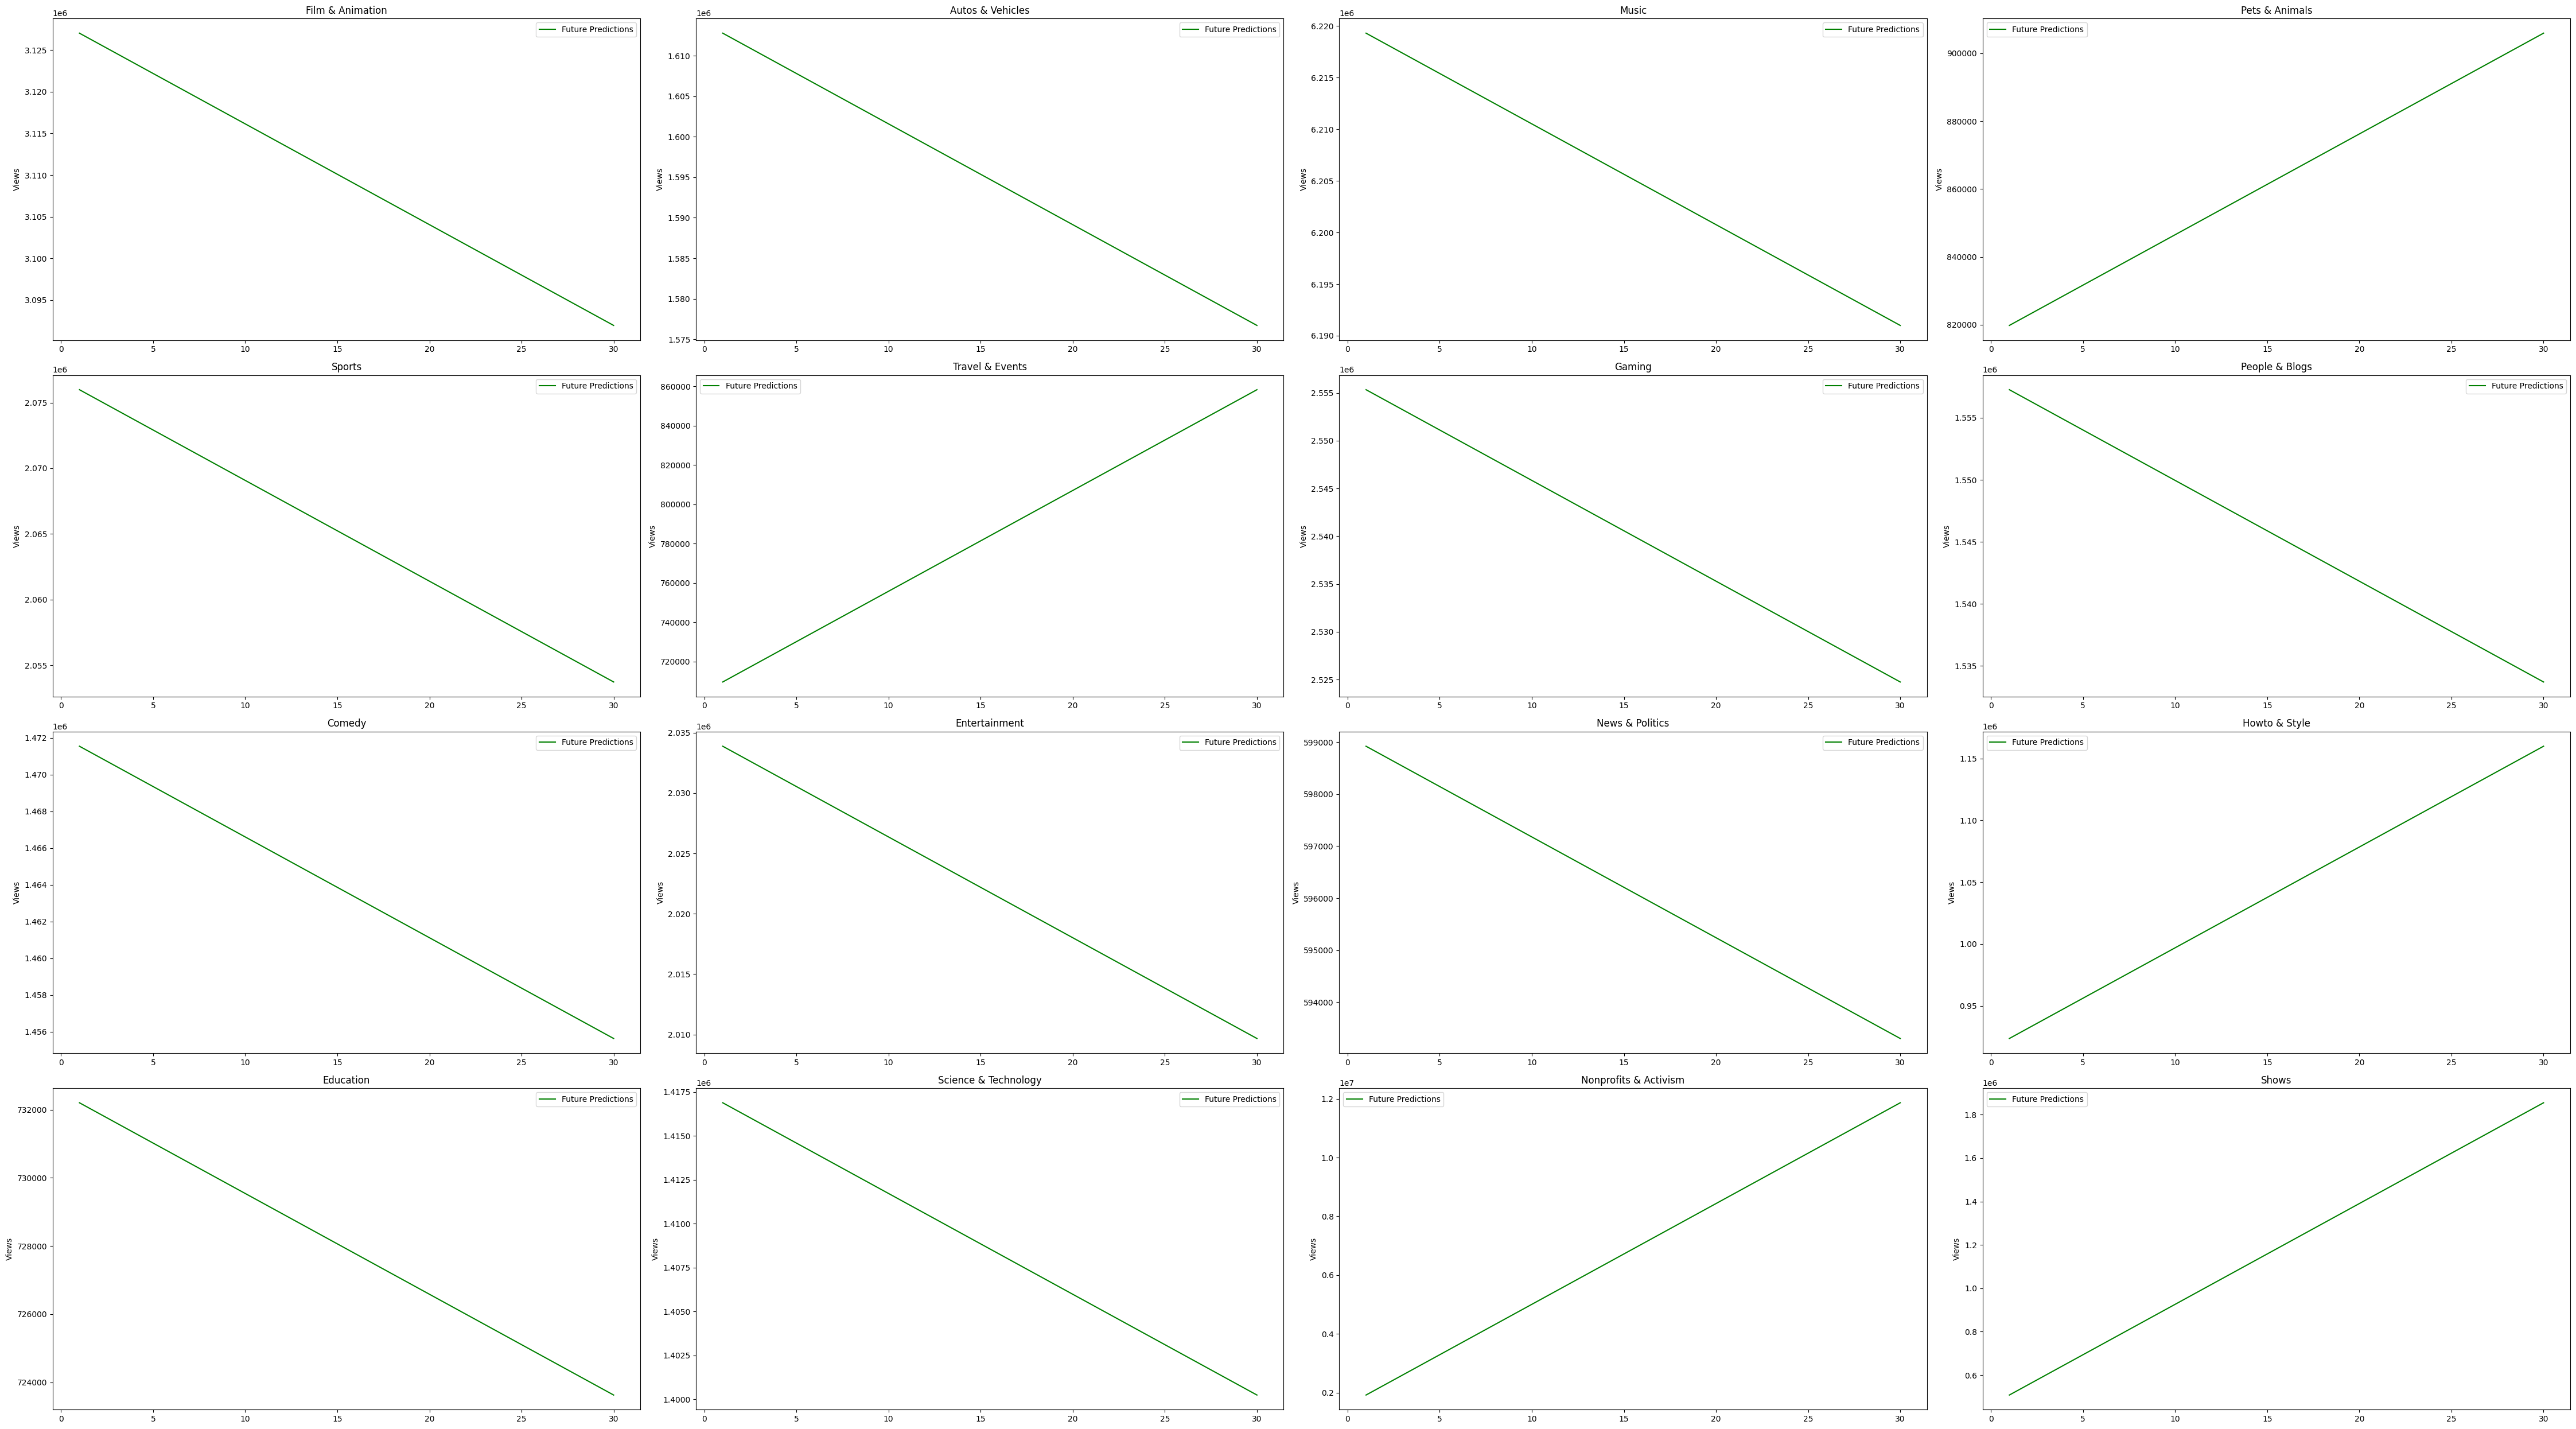

In [63]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
        axes[i, j].plot(future_days_list[i * 4 + j], future_views_list[i * 4 + j], label='Future Predictions', color='green')
        axes[i, j].set_title(category_result['title'][i * 4 + j])
        axes[i, j].set_ylabel('Views')
        axes[i, j].legend()
plt.tight_layout()
plt.show()

In [73]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
p, d, q = 1, 1, 1
forecast_steps = 30
forecast_list = []
future_dates_list = []
future_trend_dates_list = []
for i in range(len(clean_grouped_dataframes)):
  model = ARIMA(clean_grouped_dataframes[i]['views'], order=(p, d, q))
  results = model.fit()
  forecast = results.forecast(steps=forecast_steps)
  forecast_list.append(forecast)
  future_dates = [clean_grouped_dataframes[i]['publish_time'].max() + timedelta(days=j) for j in range(1, forecast_steps + 1)]
  future_dates_list.append(future_dates)
  future_trend_dates = [clean_grouped_dataframes[i]['trending_date'].max() + timedelta(days=j) for j in range(1, forecast_steps + 1)]
  future_trend_dates_list.append(future_trend_dates)

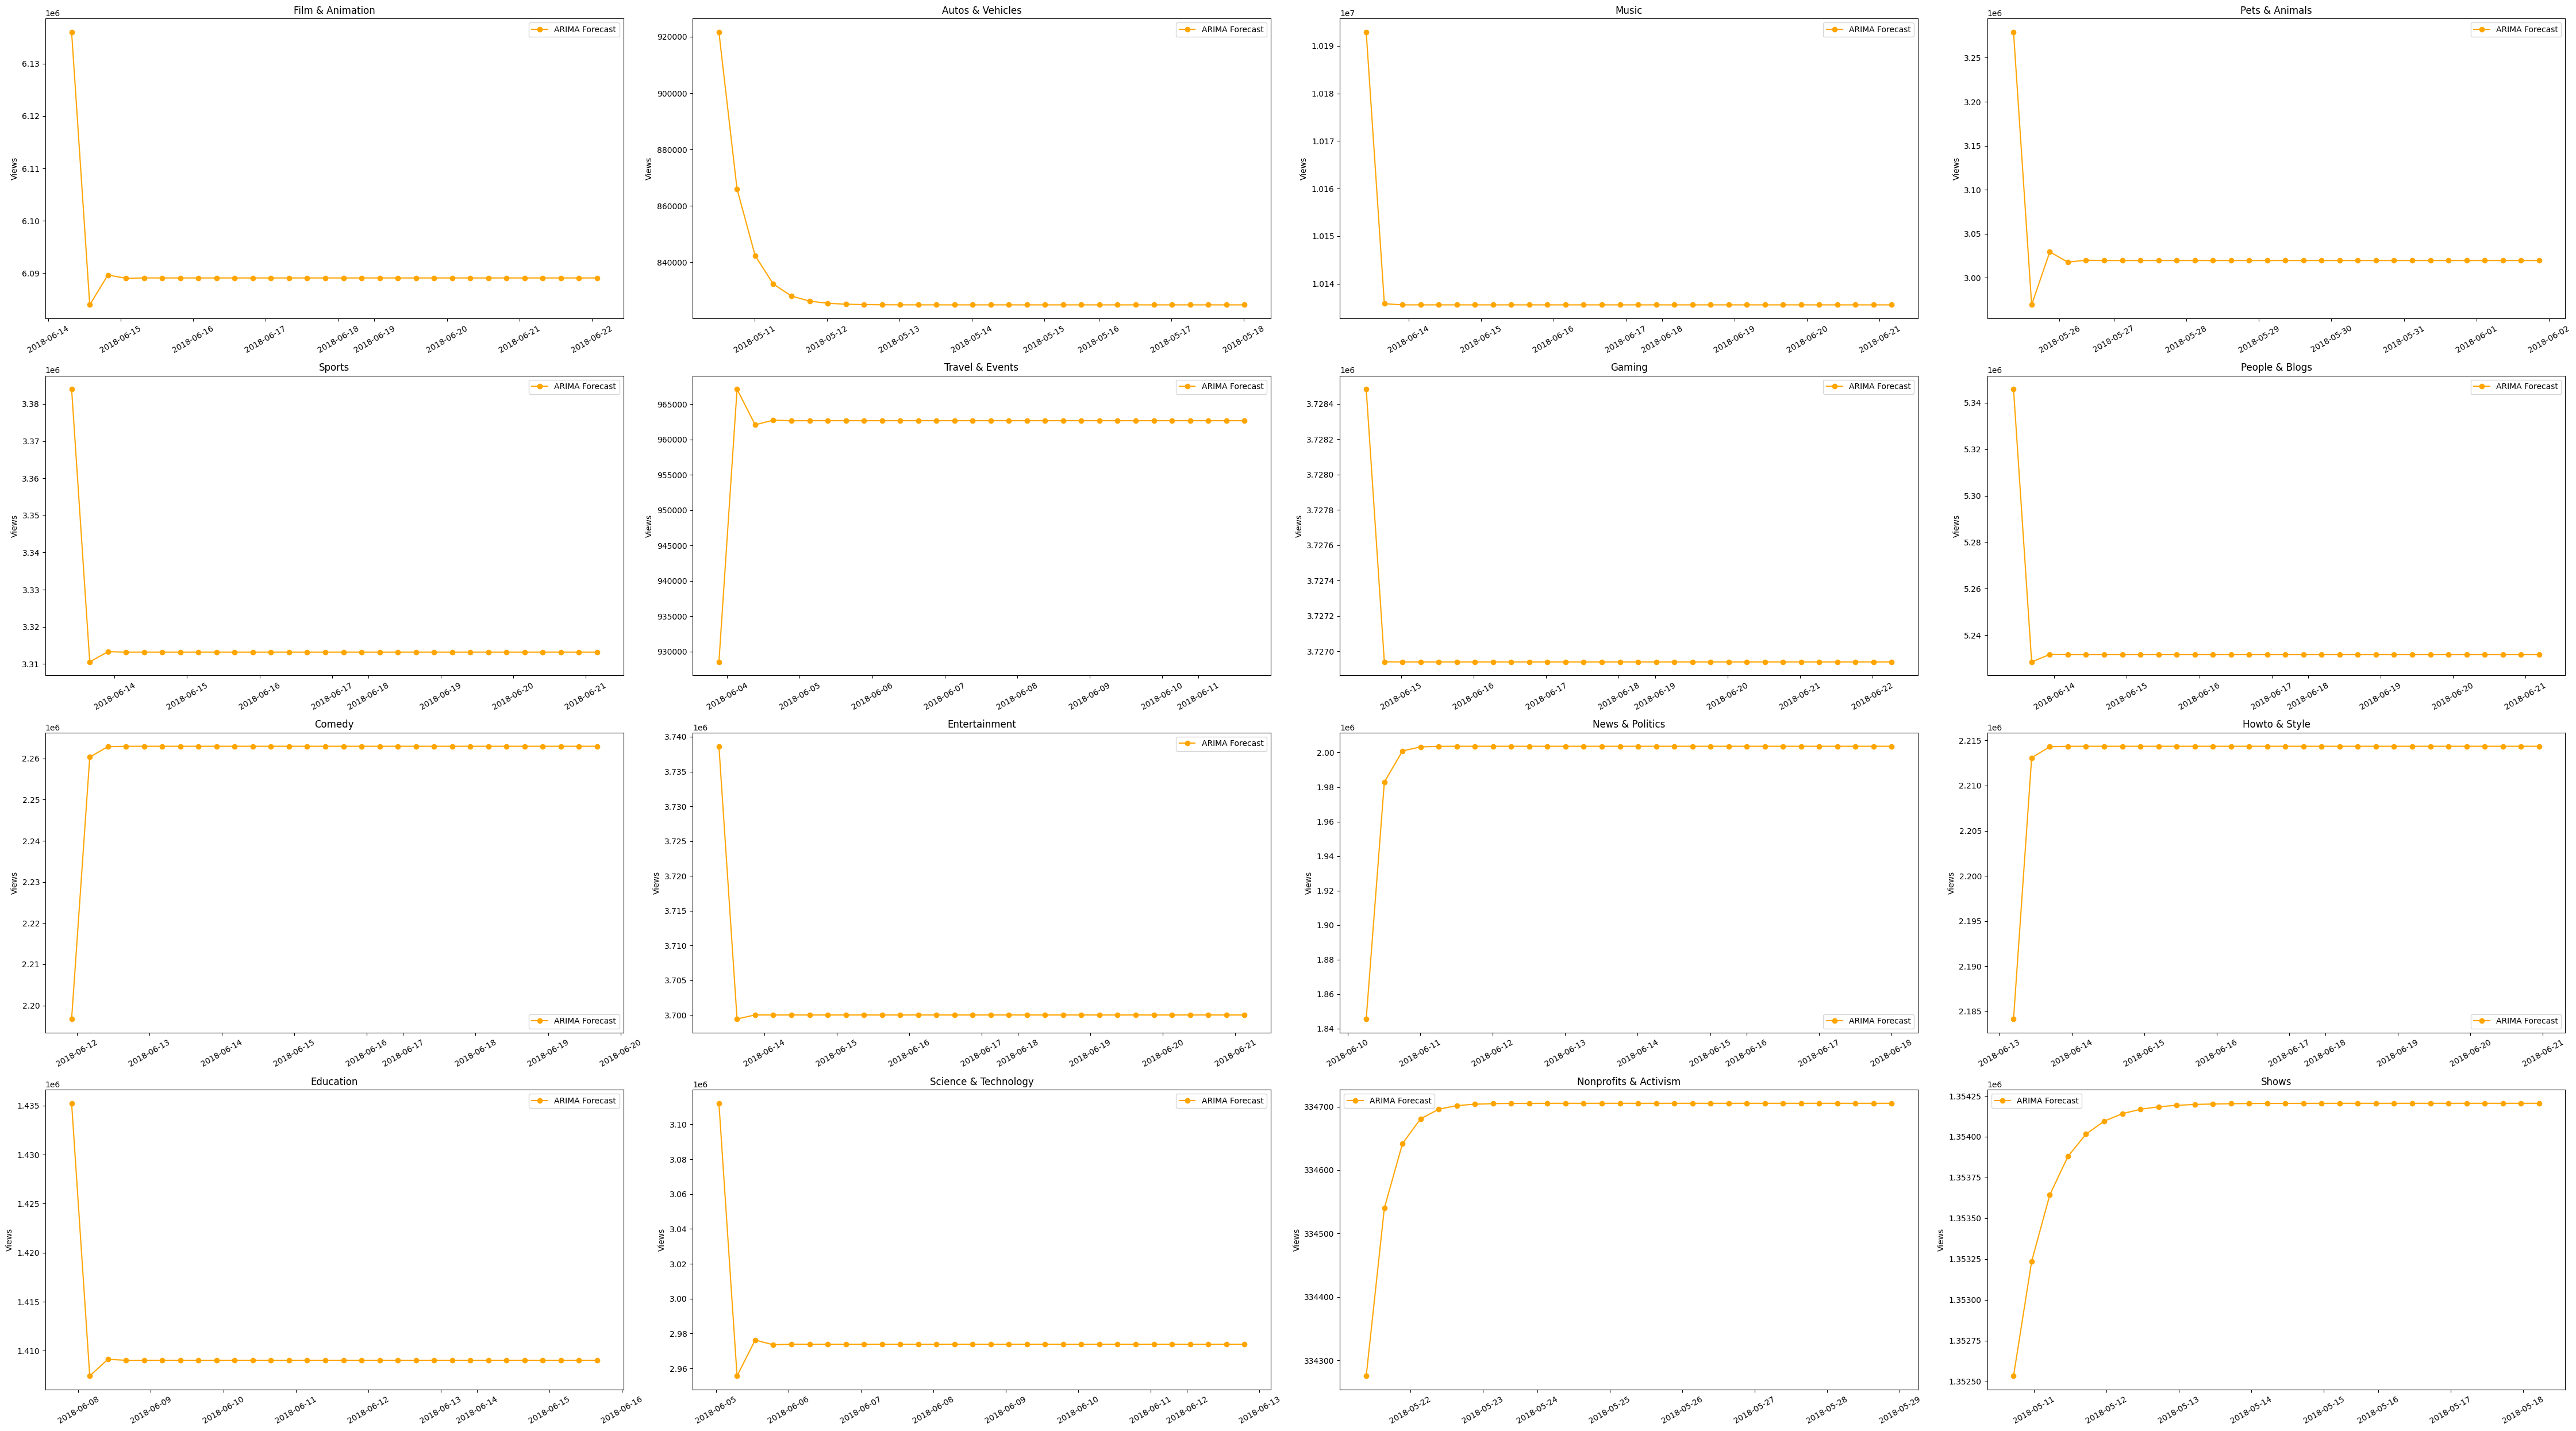

In [89]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
        axes[i, j].plot(future_dates_list[i * 4 + j], forecast_list[i * 4 + j], label='ARIMA Forecast', color='orange', marker='o')
        axes[i, j].set_title(category_result['title'][i * 4 + j])
        #axes[i, j].set_xlabel('Publish Date')
        formatted_dates = [date.strftime('%Y-%m-%d') for date in future_dates_list[i * 4 + j]]
        axes[i, j].set_xticklabels(formatted_dates, rotation=30)
        axes[i, j].set_ylabel('Views')
        axes[i, j].legend()
plt.tight_layout()
plt.show()

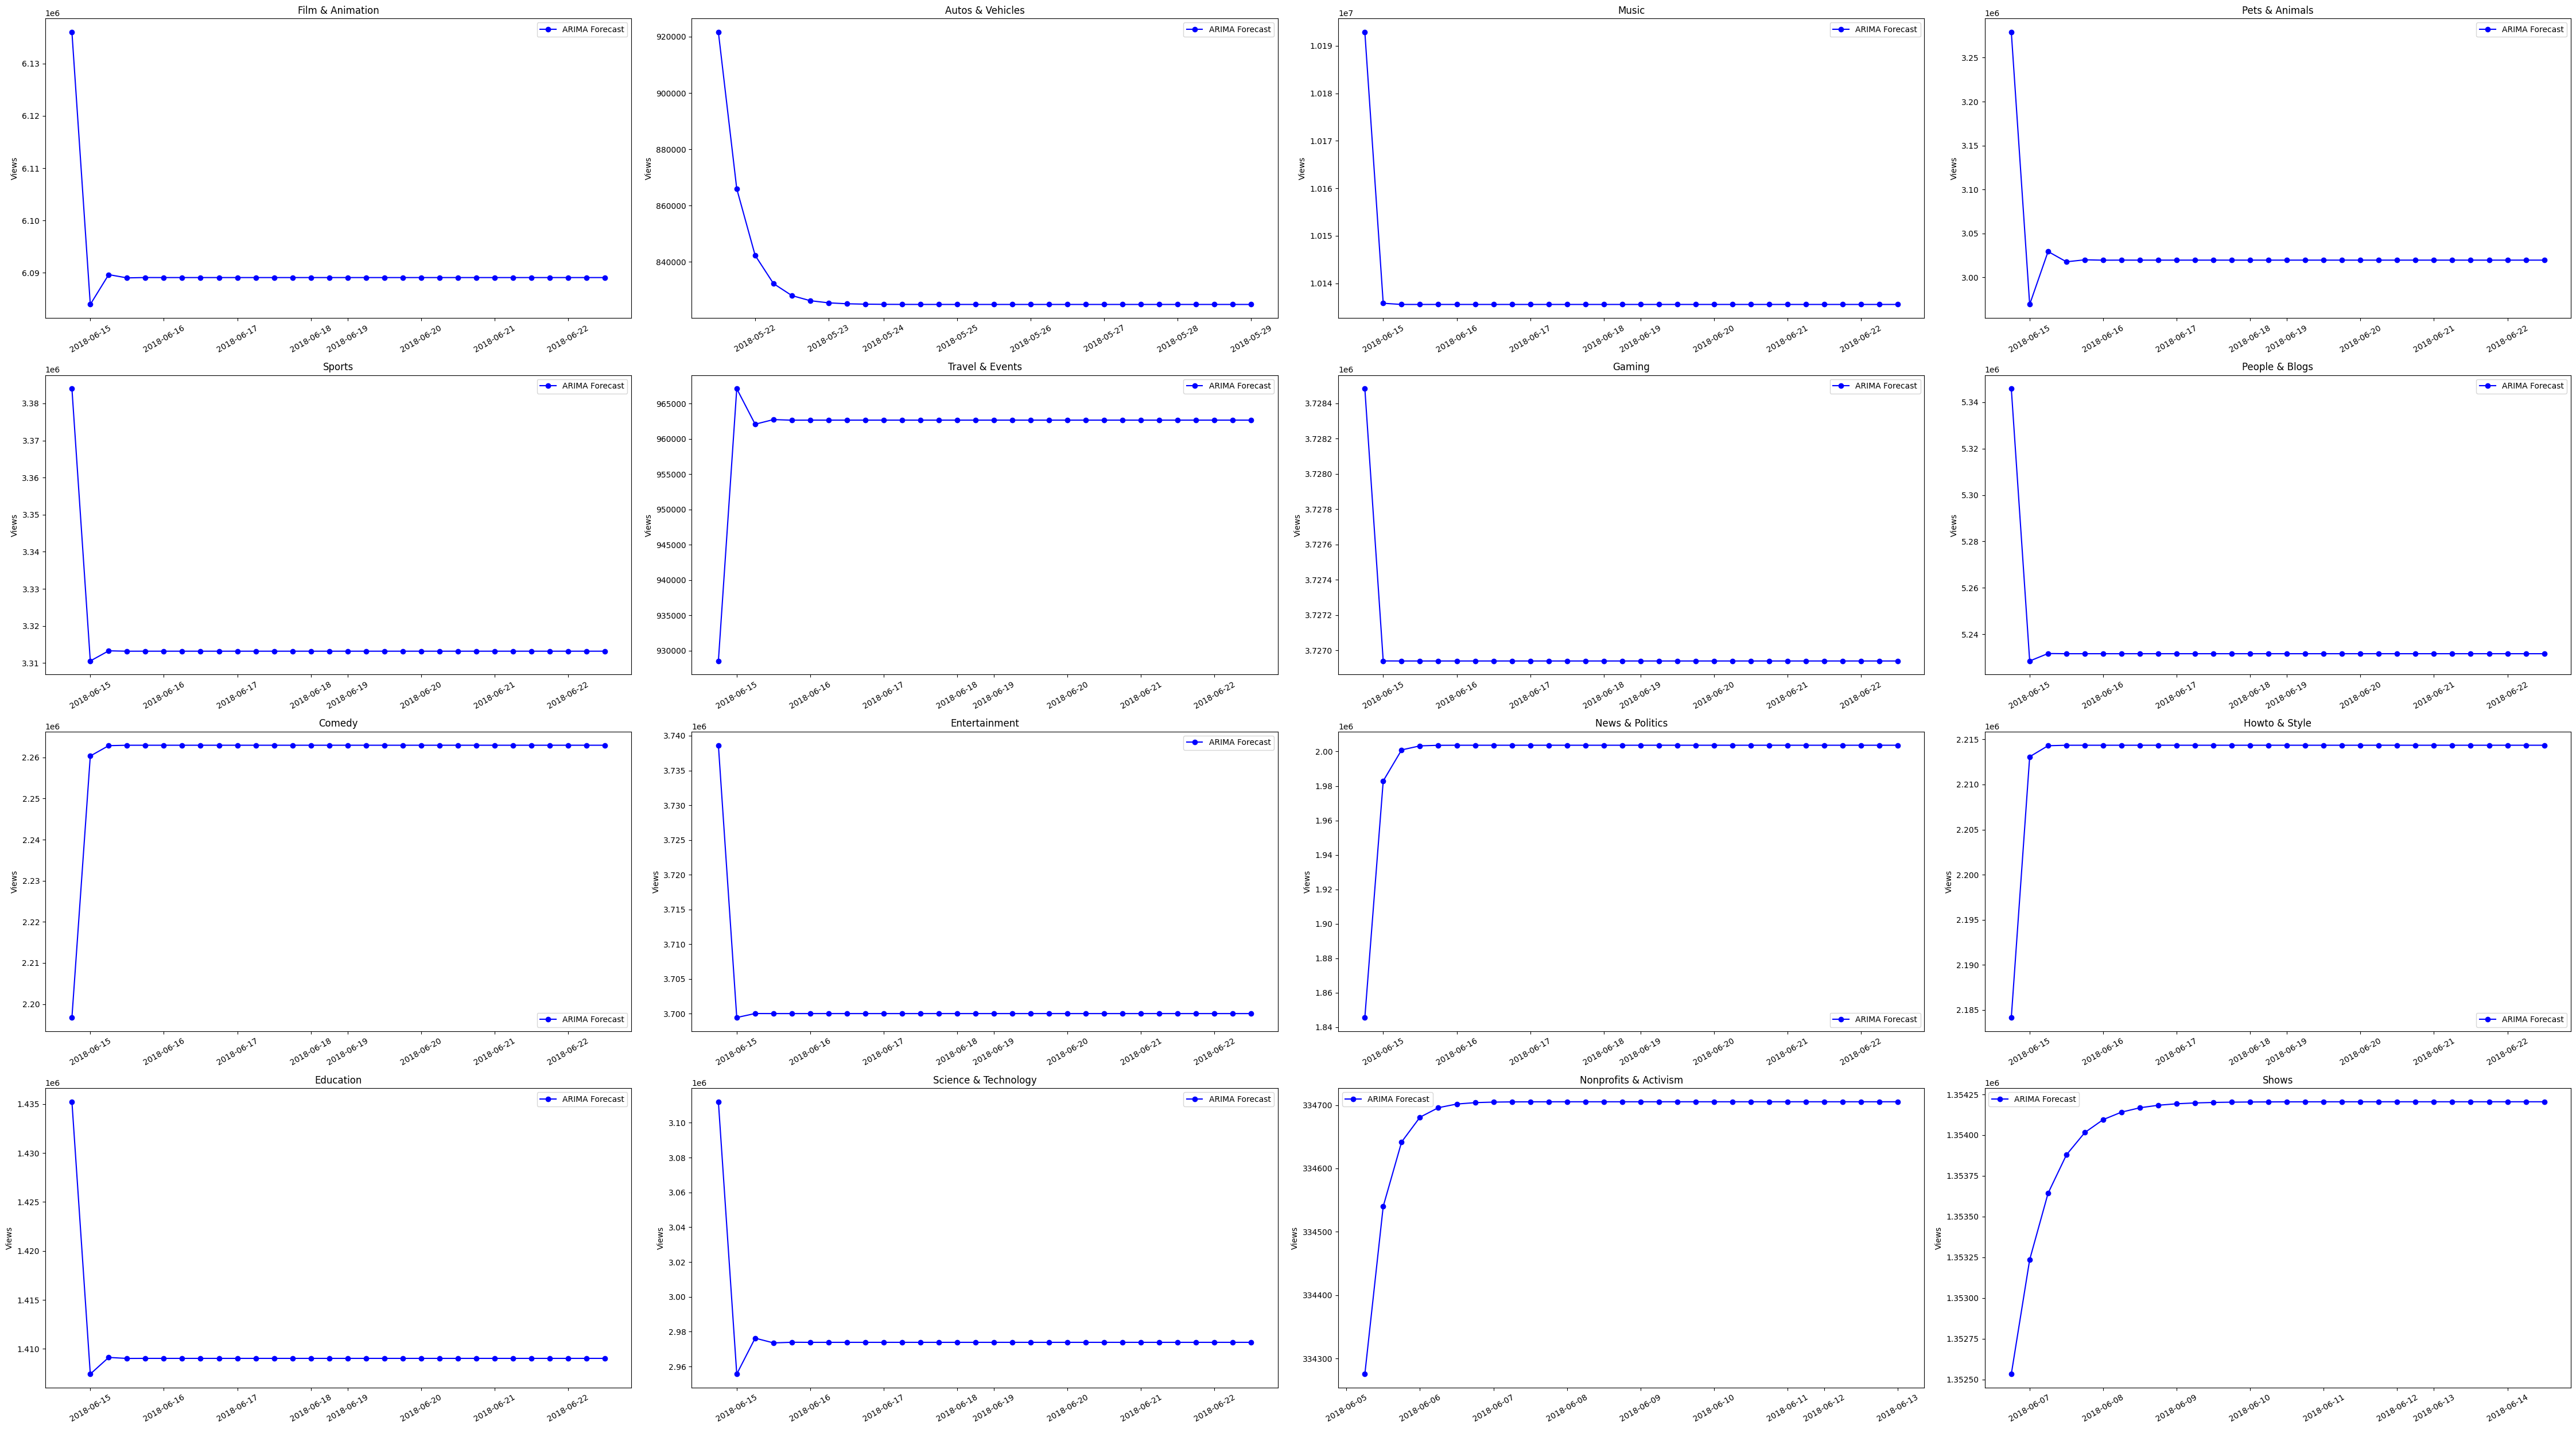

In [88]:
fig, axes = plt.subplots(4, 4, figsize=(45,25))
for i in range(4):
    for j in range(4):
        axes[i, j].plot(future_trend_dates_list[i * 4 + j], forecast_list[i * 4 + j], label='ARIMA Forecast', color='blue', marker='o')
        axes[i, j].set_title(category_result['title'][i * 4 + j])
        #axes[i, j].set_xlabel('Trending Date')
        formatted_dates = [date.strftime('%Y-%m-%d') for date in future_trend_dates_list[i * 4 + j]]
        axes[i, j].set_xticklabels(formatted_dates, rotation=30)
        axes[i, j].set_ylabel('Views')
        axes[i, j].legend()
plt.tight_layout()
plt.show()

Featuring

Word-to-bag